In [0]:
# multi-input인데, 입력 데이터가 다르다
# 그 다르다 함은, 주입력data 옆에 부 입력데이터가 있는것이 아니고,
# 주입력과 부입력data가 전혀 다른 건수로 존재할때(ex: 주입력200만건, 부입력1000건.)

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 4,890
Trainable params: 4,890
Non-trainable params: 0
_________________________________________________________________


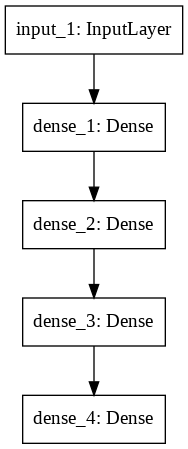

In [0]:
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model

input_dim = 32

inputs_x = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(inputs_x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model_x = Model(inputs=inputs_x, outputs=x)
model_x.summary()

from keras.utils import plot_model
plot_model(model_x, to_file='model.png')


In [0]:
import numpy as np
N = 10000

"""
 Data generation. x is purely random except that it's first value equals the target y.
    In practice, the network should learn that the target = x[attention_column].
    Therefore, most of its attention should be focused on the value addressed by attention_column.
    :param n: the number of samples to retrieve.
    :param input_dim: the number of dimensions of each element in the series.
    :param attention_column: the column linked to the target. Everything else is purely random.
    :return: x: model inputs, y: model targets
"""
def get_data(n, input_dim, attention_column=1):
    x = np.random.standard_normal(size=(n, input_dim))
    print(x.shape)
    print(x[0])
    y = np.random.randint(low=0, high=2, size=(n, 10))
    print(y.shape)
    print(y[0])
    x[:, attention_column] = y[:, 0] # attention 컬럼에 y에서 0번째 항목을 매핑
    return x, y

input_data_x, output_y = get_data(N, input_dim)
print(input_data_x.shape)
print(output_y.shape)

input_data_y, output_y2 = get_data(100, input_dim)
print(input_data_y.shape)

(10000, 32)
[ 0.95286693 -0.32025646 -0.7438854  -2.13390575 -0.35314943  0.75252162
  0.89446506  0.27663434  1.54831699 -0.64131075  1.37466456 -0.17567449
  1.43330521 -0.42471391 -0.74768307 -1.24011621 -0.15035953 -0.12947515
  2.12387268 -0.02914899  0.16049119  0.03517797 -0.48321069 -0.39440866
 -2.52624258  1.04142423 -0.86208303  1.52639986  0.38574524  1.99220084
 -1.77963362  0.51384655]
(10000, 10)
[1 0 1 0 1 1 1 1 0 1]
(10000, 32)
(10000, 10)
(100, 32)
[ 0.14927193  0.94617587 -1.55004373  0.45084439  0.24205122  1.13598416
 -0.32946627  1.35692023 -0.3752379   1.05414611  0.58355113  1.1332046
 -0.42904811 -2.73987019 -0.42992252 -0.67015086  0.88928413  0.13080482
  0.04441482  0.99073677 -1.15720943 -0.89106246 -0.68161414  0.47255532
 -2.49897227  1.49757009 -0.89357313  0.84671851  0.54167148 -0.11604101
 -1.9240562   1.46401614]
(100, 10)
[1 1 1 0 0 0 1 0 1 1]
(100, 32)


In [0]:
model_x.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #
model_x.fit(input_data_x, output_y, epochs=10, batch_size=32, validation_split=0.2) # batch_size=3, 

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 60us/step - loss: 195.3552 - accuracy: 0.1435 - val_loss: 843.5906 - val_accuracy: 0.0655
Epoch 2/10
8000/8000 [==============================] - 0s 46us/step - loss: 2744.5405 - accuracy: 0.1460 - val_loss: 4678.8826 - val_accuracy: 0.2115
Epoch 3/10
8000/8000 [==============================] - 0s 43us/step - loss: 3996.2434 - accuracy: 0.1386 - val_loss: 2622.2564 - val_accuracy: 0.0540
Epoch 4/10
8000/8000 [==============================] - 0s 44us/step - loss: 1231.4799 - accuracy: 0.1205 - val_loss: 1947.3705 - val_accuracy: 0.1220
Epoch 5/10
8000/8000 [==============================] - 0s 44us/step - loss: 1862.6154 - accuracy: 0.1182 - val_loss: 2015.6533 - val_accuracy: 0.5110
Epoch 6/10
8000/8000 [==============================] - 0s 42us/step - loss: 3001.4636 - accuracy: 0.1146 - val_loss: 6688.9895 - val_accuracy: 0.0035
Epoch 7/10
8000/8000 [==========================

In [0]:
from keras.models import load_model
# 모델 저장
model_x.save('model_x.h5')

In [0]:
ls -alrt

total 120
drwxr-xr-x 1 root root  4096 May 13 16:29 sample_data/
drwxr-xr-x 1 root root  4096 May 20 16:14 .config/
drwxr-xr-x 1 root root  4096 May 22 02:20 ../
drwxr-xr-x 1 root root  4096 May 22 02:23 ./
-rw-r--r-- 1 root root  9655 May 22 07:56 model.png
-rw-r--r-- 1 root root 90240 May 22 07:56 model_x.h5


In [0]:
# 모델 불러오기
model_x_load = load_model('model_x.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080

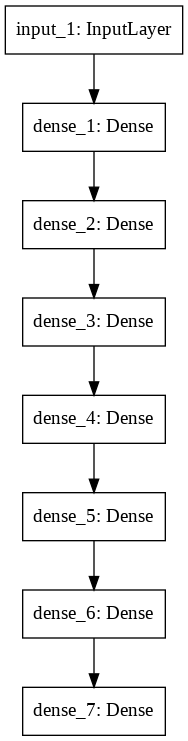

In [0]:
#새로운 layer를 붙일수 있음
inputs_y = Input(shape=(input_dim,))
y = Dense(64, activation='relu')(model_x_load.output) #이전 모델의 output
y = Dense(32, activation='relu')(y)
output = Dense(10, activation='softmax')(y)

model_y = Model(inputs=model_x_load.input, outputs=output) #이전모델의 input
model_y.summary()

from keras.utils import plot_model
plot_model(model_y, to_file='model.png')

In [0]:
model_y.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #
model_y.fit(input_data_y, output_y2, epochs=10, batch_size=32, validation_split=0.2) # 새로운 input/output으로 세팅

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 11.6404 - accuracy: 0.5875 - val_loss: 10.2750 - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 0s 124us/step - loss: 11.6421 - accuracy: 0.5875 - val_loss: 10.2775 - val_accuracy: 0.5000
Epoch 3/10
80/80 [==============================] - 0s 118us/step - loss: 11.6443 - accuracy: 0.5875 - val_loss: 10.2803 - val_accuracy: 0.5000
Epoch 4/10
80/80 [==============================] - 0s 119us/step - loss: 11.6479 - accuracy: 0.5875 - val_loss: 10.2837 - val_accuracy: 0.5000
Epoch 5/10
80/80 [==============================] - 0s 147us/step - loss: 11.6529 - accuracy: 0.5875 - val_loss: 10.2887 - val_accuracy: 0.5000
Epoch 6/10
80/80 [==============================] - 0s 136us/step - loss: 11.6572 - accuracy: 0.5875 - val_loss: 10.2946 - val_accuracy: 0.5000
Epoch 7/10
80/80 [==============================] - 0s 144us/step - loss: 11.6655 - accuracy: 